# Bike Sharing Assignment

<p style='text-align: right;'> -- By Ruchir Dhingra</p>

#### Problem Statement:

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands


## Step 1: Reading and Understanding the Data

In [1]:
# importing libraries

import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the dataset

df = pd.read_csv('day.csv')
df.head(3)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [4]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


<br>

## Step 2: Data Preparation

In [5]:
# Converting season from numerical to string variable
df['season'] = df['season'].replace({1:'spring',2:'summer',3:'fall',4:'winter'})

In [6]:
# Converting weathersit from numerical to string variable
df['weathersit'] = df['weathersit'].replace({1:'Clear', 2:'Mist', 3:'Light Rain / Snow', 4:'Heavy Rain / Snow'})

In [7]:
# Converting mnth from numerical to string variable
df['mnth'] = df['mnth'].replace({1 : 'Jan', 2 : 'Feb', 3 : 'Mar', 4 : 'Apr', 5 : 'May', 6 : 'Jun', 7 : 'Jul', 8 : 'Aug', 9 : 'Sep', 10 : 'Oct', 11 : 'Nov', 12 : 'Dec'})

In [8]:
# Converting weekday from numerical to string variable
df['weekday'] = df['weekday'].replace({0 : 'Sunday', 1 : 'Monday', 2 : 'Tuesday', 3 : 'Wednesday', 4 : 'Thursday', 5 : 'Friday', 6 : 'Saturday'})

In [9]:
# Converting yr from numerical to years
df['yr'] = df['yr'].replace({0:'2018', 1:'2019'})

In [10]:
# Converting (0 & 1's) to (yes & no)
df[['holiday','workingday']] = df[['holiday','workingday']].replace({0:'no',1:'yes'})

In [11]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,2018,Jan,no,Saturday,no,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,2018,Jan,no,Sunday,no,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,2018,Jan,no,Monday,yes,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,2018,Jan,no,Tuesday,yes,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,2018,Jan,no,Wednesday,yes,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [12]:
df.describe()

,instant,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


* The Data above doesn't seem to have Outliers, thus, as per Outliers are concerned above Data looks good to work on.

In [13]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [14]:
# Classifying columns as categorical or numerical
cat_cols = ['dteday','season','yr','mnth','holiday','weekday','workingday','weathersit']
con_cols = ['temp','atemp','hum','windspeed','casual','registered','cnt']
extra_cols = ['instant']

<br>

## Step 3: Exploratory Data Analysis

In [15]:
# Importing visualisation libraries 

import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df.weekday = pd.Categorical(df.weekday, categories=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'], ordered=True)
df.mnth = pd.Categorical(df.mnth, categories=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], ordered=True)

#### <u>Univariate Analysis</u>

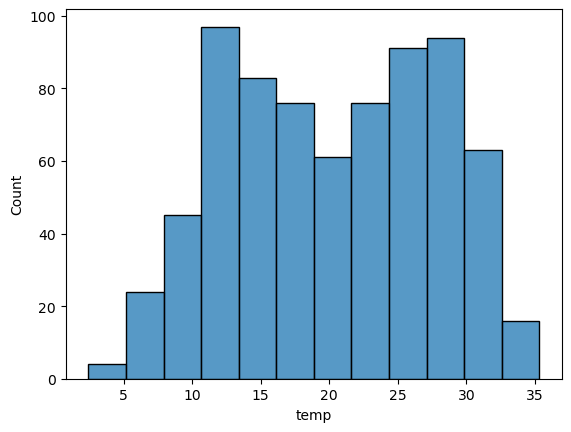

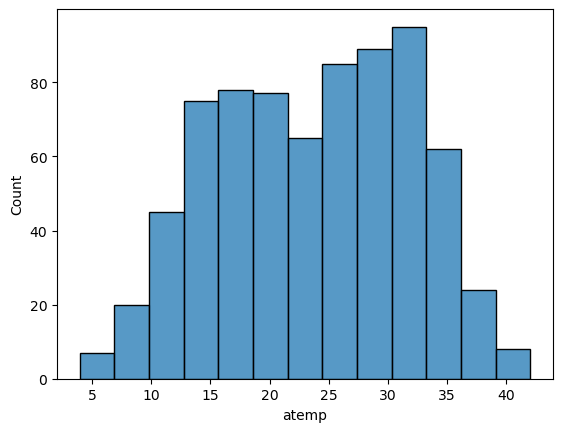

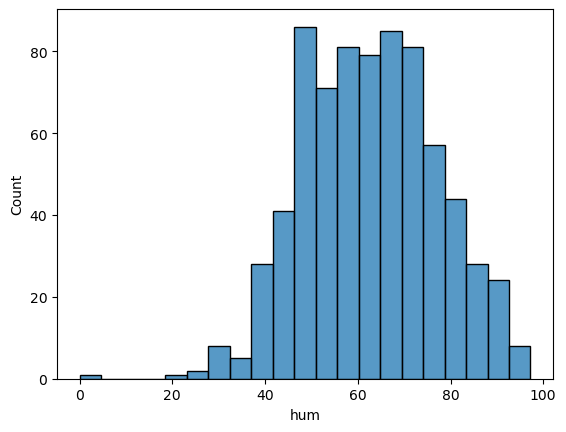

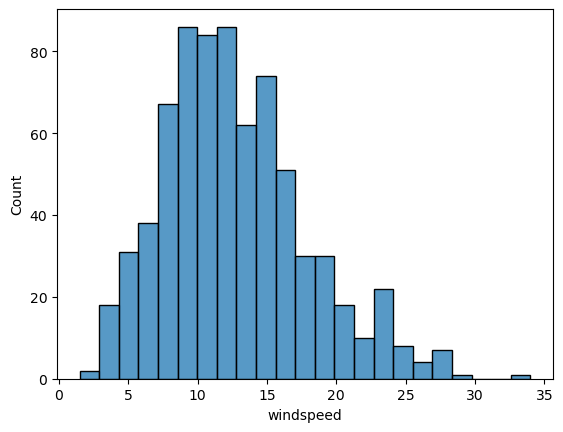

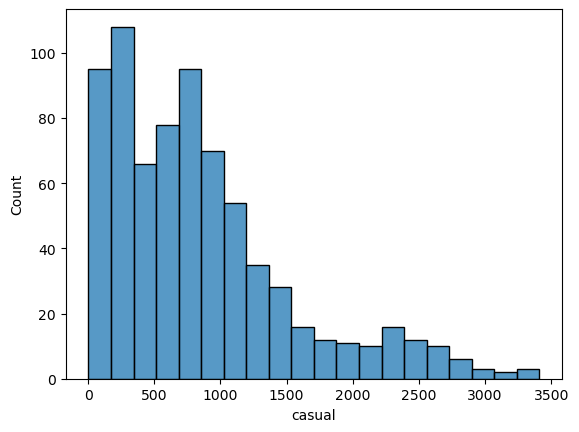

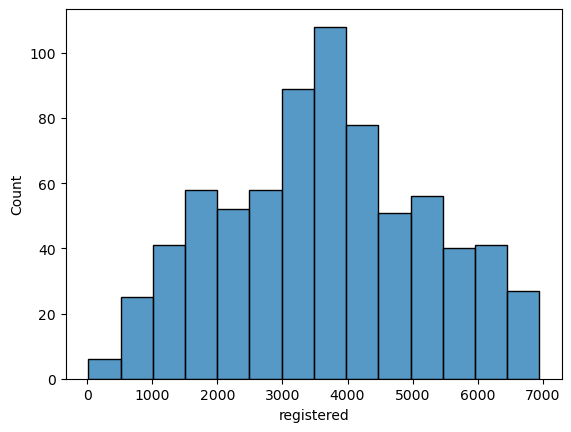

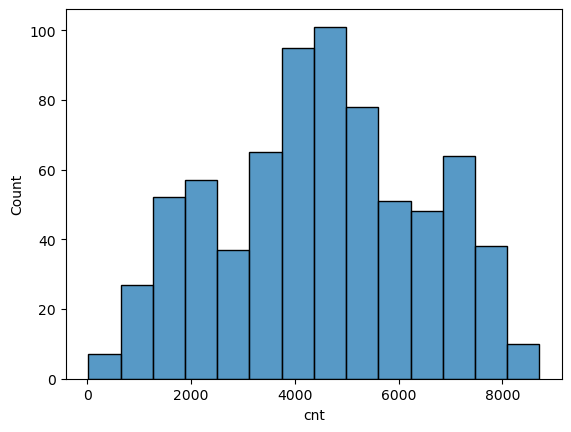

In [17]:
# Draw histogram for all Continuous Columns

for i in con_cols:
    sns.histplot(df[i])
    plt.show()

* Temperature has majorly been between 15 to 35 Celsius
* Majority of times humidity ranges from 50 to 75
* Windspeed usually varies from 7 to 16 kmph
* In terms of casual users, they have been ranging more from 0 to 1000 users
* Registered Users stayed consistent in giving high number of users

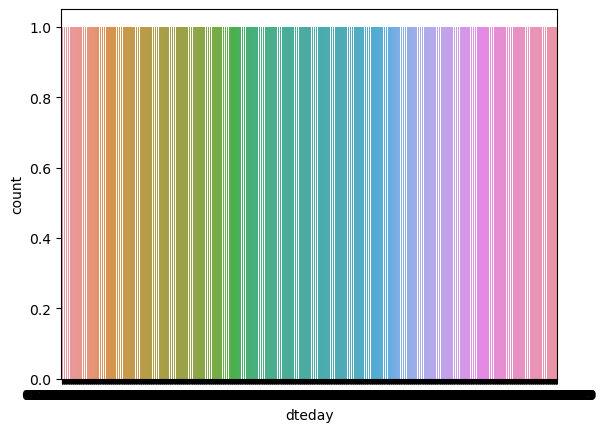

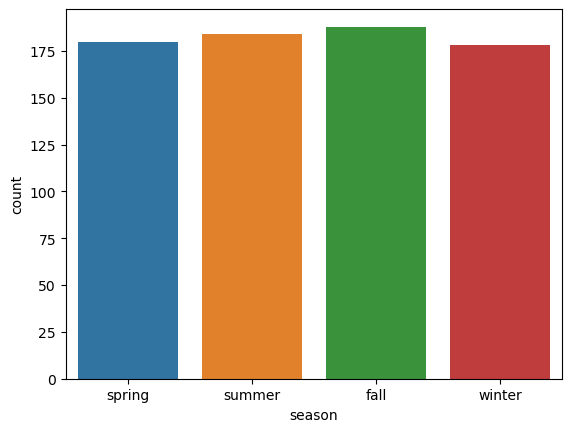

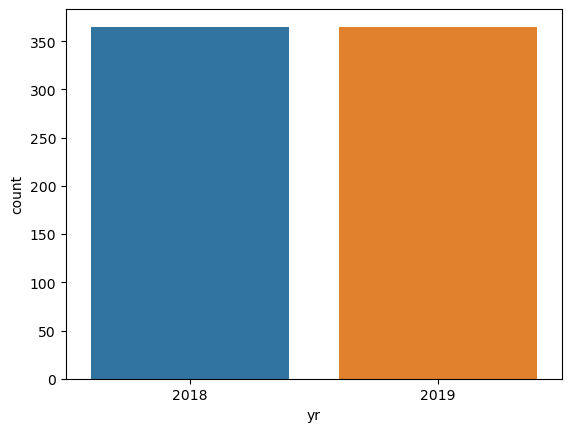

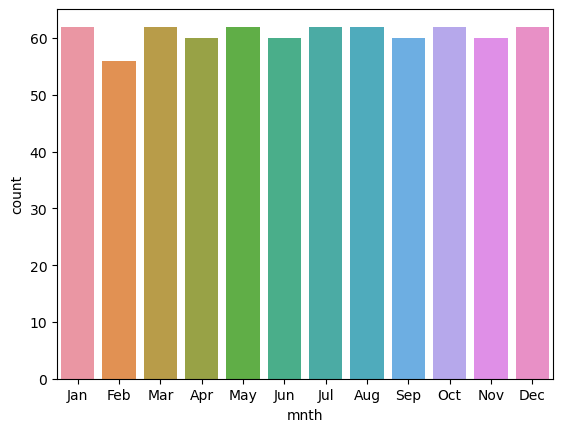

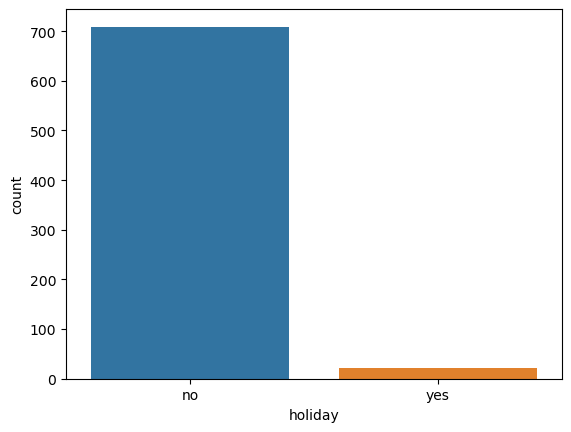

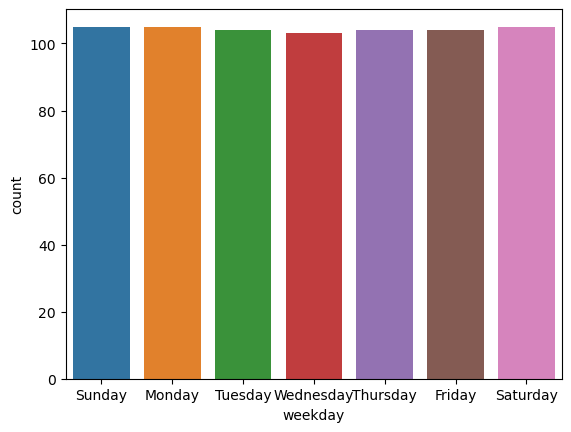

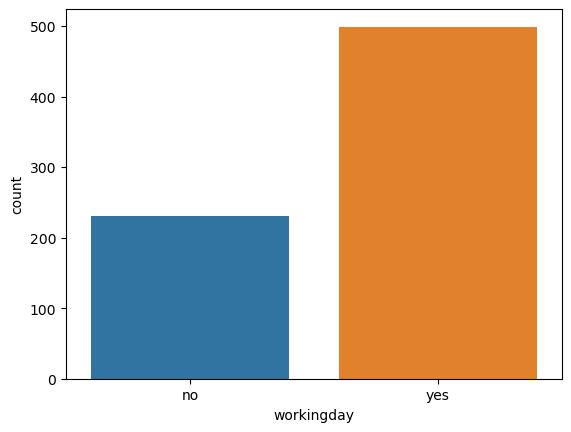

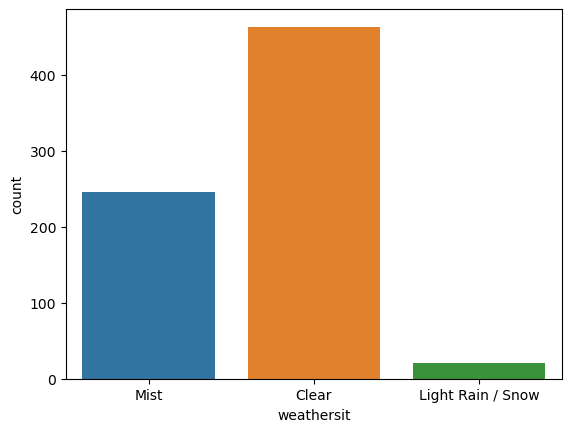

In [18]:
# Countplot for all Categorical columns
for i in cat_cols:
    sns.countplot(x=df[i])
    plt.show()

* Univariate Analysis on Categorical variables doesn't much insights because it ajorly is giving no of days in year & months, number of weekdays which doesn't help us.

#### <u>Segmented Univariate Analysis</u>

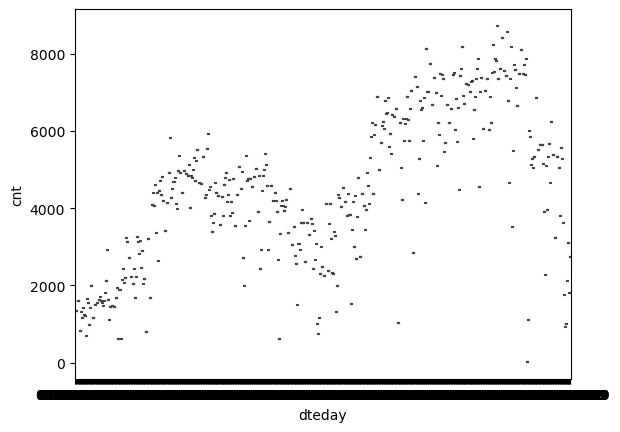

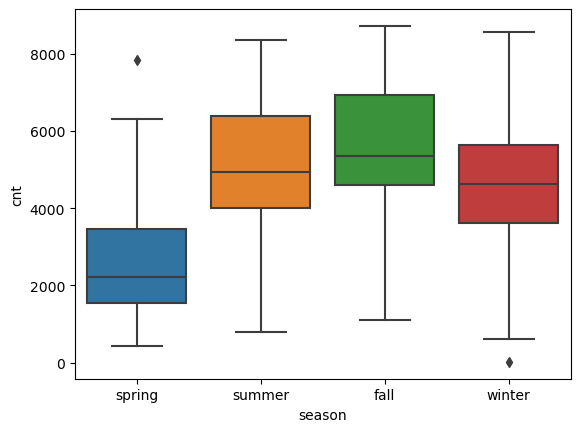

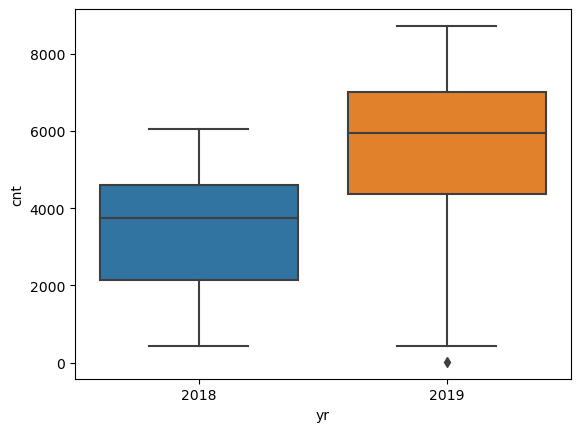

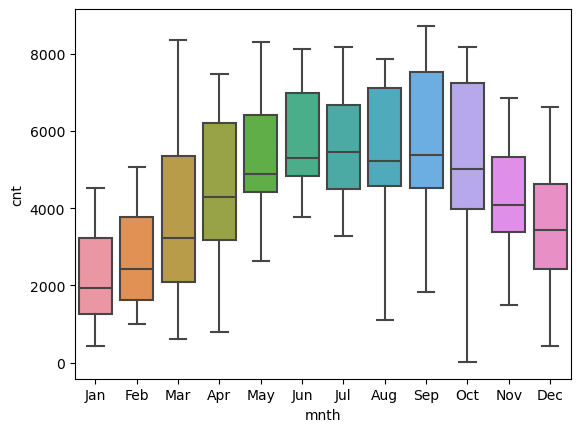

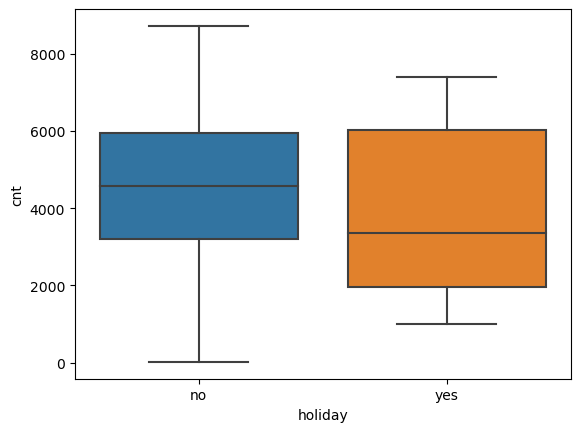

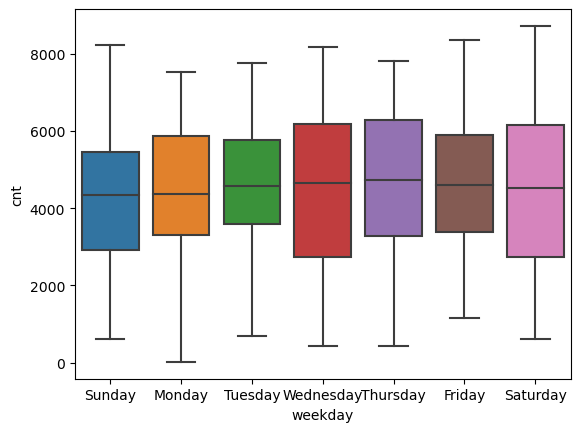

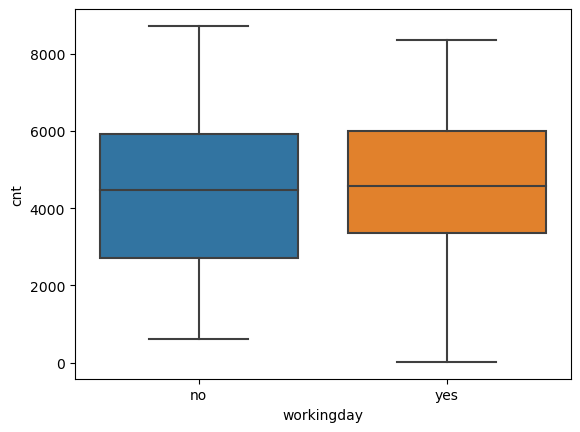

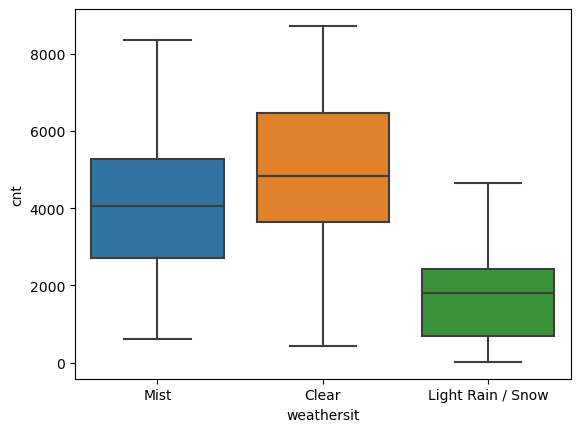

In [19]:
for col in cat_cols:
    sns.boxplot(data=df,x=col,y='cnt')
    plt.show()

* ```season``` seems to be having quite impact on count of Bike Riders, the Bike Riders are increasing mostly in Autumn/Fall(3) season, followed by summer(2) season and being the lowest in spring(1) season.
* The Bike Rides can be seen having huge rise in year 2019 due to increasing companies awareness in the market.
* ```mnth``` seems to be showing increase in count of bike rides from the beginning of the year and being at the peak in mid year months and then later decrease depicting the season cycle again.
* They seem to have comparatively lesser bike rides on holidays, ie, people could have been using bike rides for work purposes.
* ```weathersit``` depicts decrease in bike rides with increase in mist, rainfall or snowfall.

### <u>Bivariate Analysis</u>

<Figure size 5000x2800 with 0 Axes>

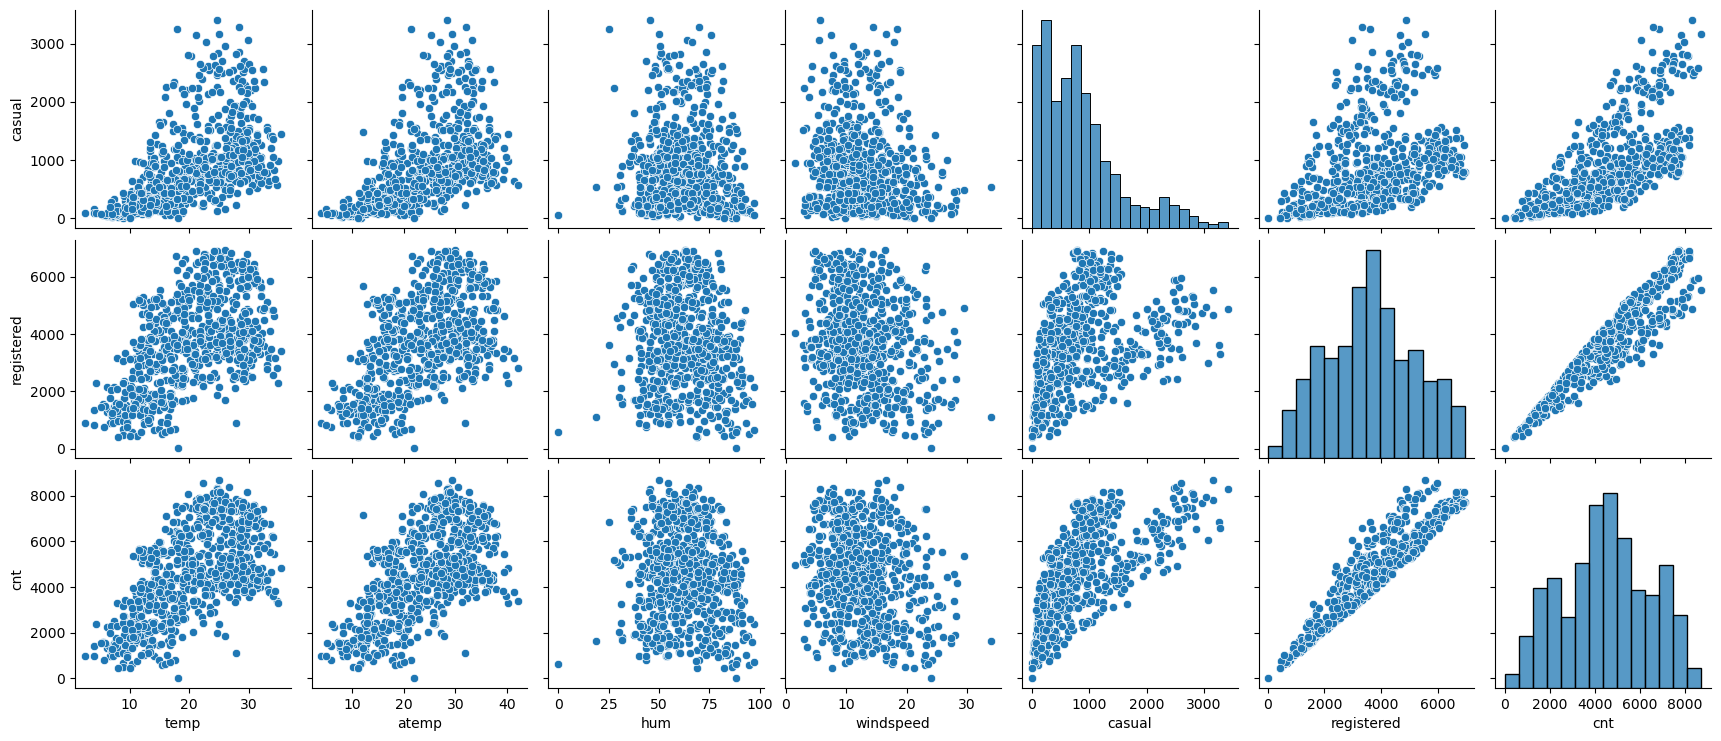

In [20]:
plt.figure(figsize=(50,28))
sns.pairplot(data=df, x_vars = con_cols , y_vars = ['casual','registered','cnt'])
plt.show()

<Axes: >

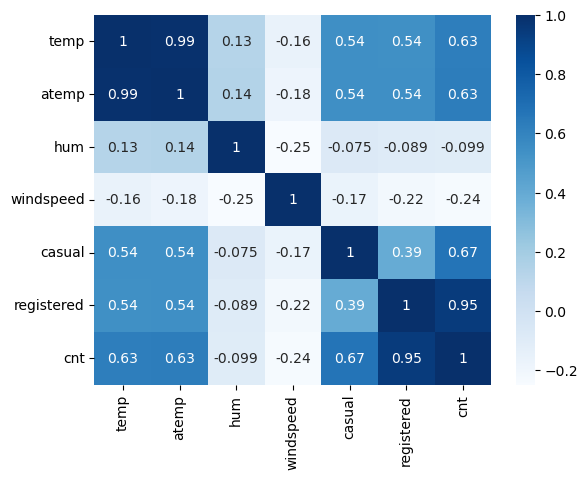

In [21]:
# Analysing numerical / continuous columns by visulaising
sns.heatmap(df[con_cols].corr(),cmap="Blues",annot=True)

* atemp and temp seems to be highly corelated thus, they both would geet same inferences therefore, would drop column named 'temp', because, 'atemp' is actual felt temperature therefore in my opinion it would have higher relevance in dataset.
* ```cnt``` would be our target variable and since we already know that it is sum of casual and registered users and from above corelation matrix it can seen that it is majorly based in registered users.
* ```atemp``` seem to have high corelation with target variable ```cnt``` and from pairplot of them above it seems that with increasing temperature there have been much usage/counts of Bikes.

In [22]:
df.drop('temp', axis=1, inplace=True)

In [23]:
con_cols.remove('temp')

In [24]:
def Bivariate_HeatMap(x_col, y_col, x_label, y_label):
    # Create a pivot table with 'season' and 'workingday' as rows, and 'cnt' as values
    pivot = df.pivot_table(index= y_col, columns= x_col, values='cnt', aggfunc='mean')

    # Create a heatmap to visualize the relationships
    hm = sns.heatmap(pivot, annot=True, fmt=".2f", cmap='Blues')
    hm.set(xlabel= x_label, ylabel = y_label, title = f'Average Bike Users w.r.t. {x_label} vs. {y_label}')
    plt.show()

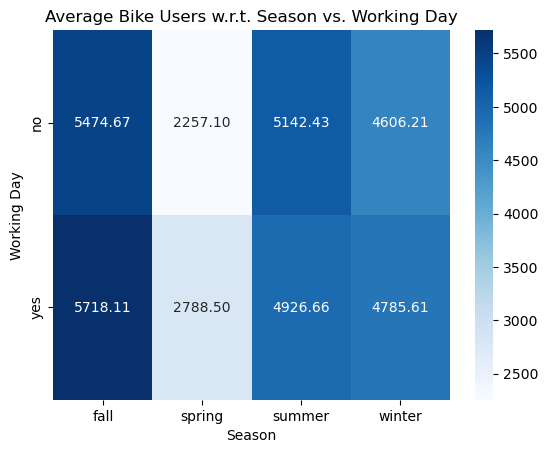

In [25]:
Bivariate_HeatMap('season','workingday','Season','Working Day')

* There has been a slightly less bike users on non working days and fall season has attracted highest number of users whereas spring season attracted the least.

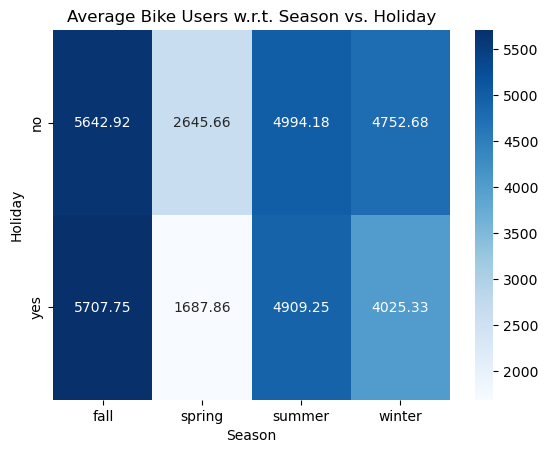

In [26]:
Bivariate_HeatMap('season','holiday','Season','Holiday')

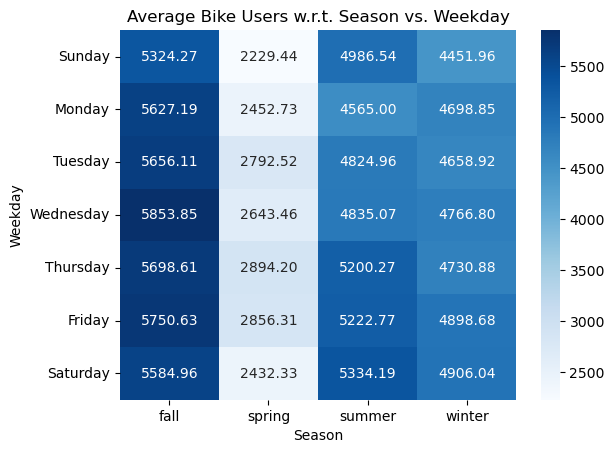

In [27]:
Bivariate_HeatMap('season','weekday','Season','Weekday')

<Axes: xlabel='season', ylabel='cnt'>

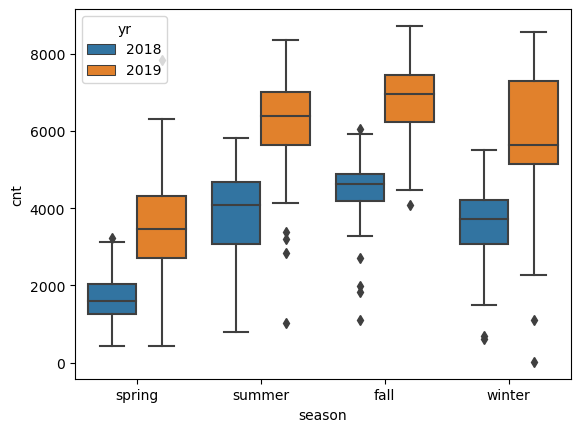

In [28]:
sns.boxplot(data=df,x='season',y='cnt',hue='yr')

* The bike users kept increasing with time with little downfalls in winter season.

<Axes: xlabel='weekday', ylabel='cnt'>

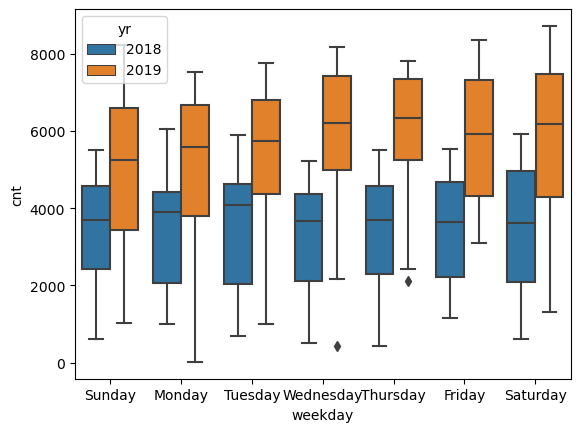

In [29]:
sns.boxplot(data=df, x='weekday', y='cnt', hue='yr')

<Axes: xlabel='mnth', ylabel='cnt'>

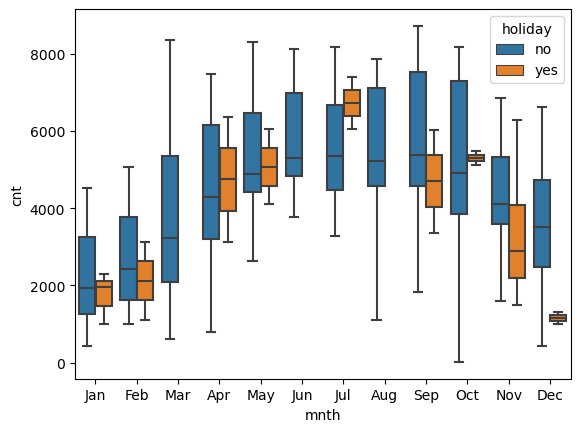

In [30]:
sns.boxplot(data=df, x='mnth', y='cnt', hue='holiday')

### <u>Derived Metrics</u>

In [31]:
# function to bin columns into very low, low, medium, high & very high

def col_to_bins(col_name, new_col_name):
    df[new_col_name] = pd.qcut(df[col_name], q=5, labels=['very low','low','medium','high','very high'])

In [32]:
col_to_bins('atemp','atemp_binned')
col_to_bins('hum','hum_binned')
col_to_bins('windspeed','windspeed_binned')

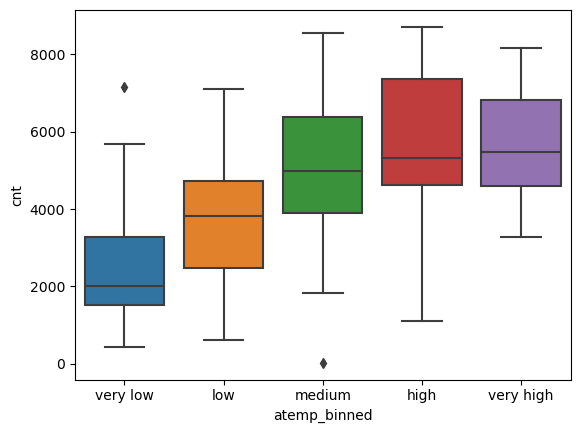

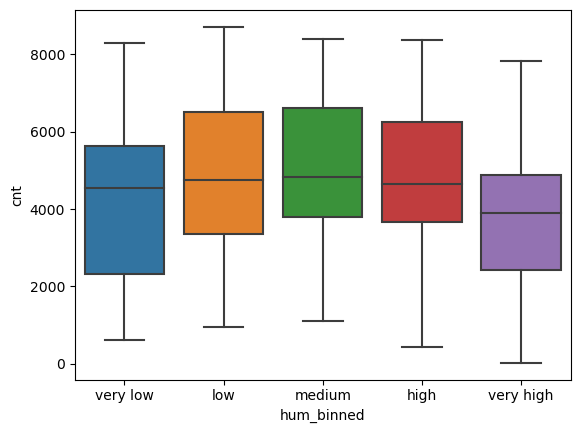

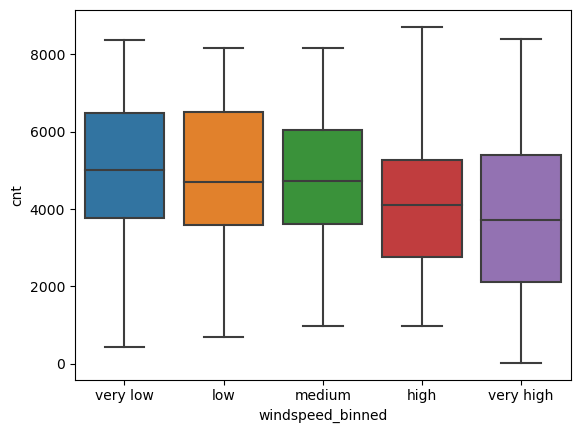

In [33]:
for col in ['atemp_binned','hum_binned','windspeed_binned']:
    sns.boxplot(data=df,x=col,y='cnt')
    plt.show()

* With increasing atemp the bike riders seem to be increasing.
* Humidity and Windspeed doesn't seem to be affecting Bike Riders

<Axes: xlabel='atemp_binned', ylabel='cnt'>

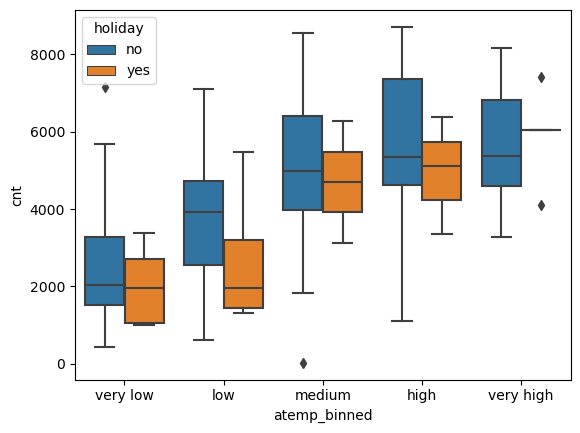

In [34]:
sns.boxplot(data=df, x='atemp_binned', y='cnt', hue='holiday')

In [35]:
# Dropping binned columns

df.drop(['atemp_binned','hum_binned','windspeed_binned'], axis=1, inplace=True)

<br>

### Step 4 - Data Preparation before Linear Regression

In [36]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,2018,Jan,no,Saturday,no,Mist,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,2018,Jan,no,Sunday,no,Mist,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,2018,Jan,no,Monday,yes,Clear,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,2018,Jan,no,Tuesday,yes,Clear,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,2018,Jan,no,Wednesday,yes,Clear,11.46350,43.6957,12.522300,82,1518,1600


In [37]:
# Converting two output categorical variables to 0's & 1's

df.yr = df.yr.replace({'2018':0, '2019':1})
df.holiday = df.holiday.replace({'no':0, 'yes':1})
df.workingday = df.workingday.replace({'no':0, 'yes':1})

In [38]:
# Dropping casual & registered users as our target variable 'cnt' is sum of both

df.drop(['casual','registered'],axis=1,inplace=True)

# Removing from con_cols list as well
for x in ['casual', 'registered']:    
    con_cols.remove(x)

In [39]:
# Converting Categorigal variables to Dummy Columns

season_dummies = pd.get_dummies(data=df.season,prefix='season',drop_first=True)
month_dummies = pd.get_dummies(data=df.mnth,drop_first=True)
weekday_dummies = pd.get_dummies(data=df.weekday,drop_first=True)
weathersit_dummies = pd.get_dummies(data=df.weathersit,prefix='weather',drop_first=True)

all_dummies = pd.concat([season_dummies, month_dummies, weekday_dummies, weathersit_dummies], axis=1)

In [40]:
df = pd.concat([df,all_dummies], axis=1)

In [41]:
# Dropping colums that have turned to Dummy Columns

df.drop(['season', 'mnth', 'weekday', 'weathersit'], axis=1, inplace = True)

In [42]:
df.head()

,instant,dteday,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_spring,...,Nov,Dec,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,weather_Light Rain / Snow,weather_Mist
0,1,01-01-2018,0,0,0,18.18125,80.5833,10.749882,985,1,...,0,0,0,0,0,0,0,1,0,1
1,2,02-01-2018,0,0,0,17.68695,69.6087,16.652113,801,1,...,0,0,0,0,0,0,0,0,0,1
2,3,03-01-2018,0,0,1,9.47025,43.7273,16.636703,1349,1,...,0,0,1,0,0,0,0,0,0,0
3,4,04-01-2018,0,0,1,10.60610,59.0435,10.739832,1562,1,...,0,0,0,1,0,0,0,0,0,0
4,5,05-01-2018,0,0,1,11.46350,43.6957,12.522300,1600,1,...,0,0,0,0,1,0,0,0,0,0


In [43]:
# Dropping Date & instant / S. No. column as they are not needed

df.drop(['instant', 'dteday'], axis=1, inplace = True)

In [44]:
df.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,Nov,Dec,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,weather_Light Rain / Snow,weather_Mist
0,0,0,0,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,0,0,0,0,0,1,0,1
1,0,0,0,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,1,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,1,0,0,0,0,0


#### Splitting Data to Train & Test Data

In [45]:
# import library for splitting data into train and test data

import sklearn
import sklearn.model_selection

In [46]:
df_train, df_test = sklearn.model_selection.train_test_split(df, train_size=0.7, random_state=50)

In [47]:
print(df_train.shape)
print(df_test.shape)

(510, 29)
(220, 29)


In [48]:
df.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,Nov,Dec,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,weather_Light Rain / Snow,weather_Mist
0,0,0,0,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,0,0,0,0,0,1,0,1
1,0,0,0,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,1,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,1,0,0,0,0,0


#### Re-Scaling Features

In [49]:
# import library for rescaling continuous columns

import sklearn.preprocessing

In [50]:
# Mapping MinMaxScaler Class to an object

scaler = sklearn.preprocessing.MinMaxScaler()

In [51]:
con_cols

['atemp', 'hum', 'windspeed', 'cnt']

In [52]:
# Applying scaler() to Continuous Variables by training on Train Set

df_train[con_cols] = scaler.fit_transform(df_train[con_cols])

In [53]:
df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,Nov,Dec,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,weather_Light Rain / Snow,weather_Mist
172,0,0,1,0.858891,0.729068,0.274549,0.515992,0,0,0,...,0,0,0,0,1,0,0,0,0,0
14,0,0,0,0.236172,0.513954,0.243603,0.141049,1,0,0,...,0,0,0,0,0,0,0,1,0,1
204,0,0,0,1.000000,0.567625,0.267859,0.412333,0,0,0,...,0,0,0,0,0,0,0,0,0,0
182,0,0,0,0.821838,0.458136,0.150755,0.586401,0,0,0,...,0,0,0,0,0,0,0,1,0,0
708,1,0,1,0.498080,0.953198,0.313605,0.592269,0,0,1,...,0,1,1,0,0,0,0,0,0,1


<br>

### Step 5 : Building Linear Model

In [54]:
# Diving into X and y variables for model

y_train = df_train.pop('cnt')
X_train = df_train

In [55]:
# importing statsmodel library for building model

import statsmodels.api as sm

In [56]:
# Adding constant to X_train Data

X_train_sm = sm.add_constant(X_train)

In [57]:
# Creating a fitted model

st_lr = sm.OLS(y_train,X_train_sm).fit()

In [58]:
# Linear Regression Summary

st_lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     105.9
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          1.60e-183
Time:                        18:22:00   Log-Likelihood:                 534.94
No. Observations:                 510   AIC:                            -1014.
Df Residuals:                     482   BIC:                            -895.3
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.2684      0.043      6.263      0.000       0.184       0.353
yr                            0.2353      0.008     29.762      0.000       0.220       0.251
holiday                      -0.0095      0.024     -0.397      0.692      -0.057       0.038
workingday                    0.0317      0.009      3.355      0.001       0.013       0.050
atemp                         0.4151      0.044      9.514      0.000       0.329       0.501
hum                          -0.1960      0.039     -5.068      0.000      -0.272      -0.120
windspeed                    -0.1724      0.026     -6.755      0.000      -0.223      -0.122
season_spring                -0.0694      0.030     -2.313      0.021      -0.128      -0.010
season_summer                 0.0186      0.025      0.746      0.456      -0.030       0.068
season_winter                 0.1203      0.029      4.084      0.000       0.062       0.178
Feb                           0.0269      0.020      1.319      0.188      -0.013       0.067
Mar                           0.0642      0.022      2.887      0.004       0.021       0.108
Apr                           0.0677      0.035      1.963      0.050   -6.63e-05       0.136
May                           0.1047      0.036      2.905      0.004       0.034       0.175
Jun                           0.1043      0.038      2.739      0.006       0.029       0.179
Jul                           0.0613      0.043      1.432      0.153      -0.023       0.145
Aug                           0.0858      0.041      2.092      0.037       0.005       0.166
Sep                           0.1380      0.037      3.694      0.000       0.065       0.211
Oct                           0.0516      0.033      1.565      0.118      -0.013       0.116
Nov                          -0.0150      0.032     -0.476      0.634      -0.077       0.047
Dec                          -0.0087      0.025     -0.341      0.733      -0.059       0.041
Monday                       -0.0131      0.010     -1.360      0.175      -0.032       0.006
Tuesday                      -0.0055      0.011     -0.520      0.603      -0.026       0.015
Wednesday                     0.0069      0.011      0.644      0.520      -0.014       0.028
Thursday                      0.0152      0.011      1.441      0.150      -0.006       0.036
Friday                        0.0186      0.011      1.753      0.080      -0.002       0.039
Saturday                      0.0525      0.015      3.463      0.001       0.023       0.082
weather_Light Rain / Snow    -0.2093      0.026     -8.114      0.000      -0.260      -0.159
weather_Mist                 -0.0473      0.011     -4.477      0.000      -0.068      -0.027
===========================================================================

In [59]:
len(X_train.columns)

28

* Since, we have 28 features in our Regression Model which is very high, thus, we would use RFE (Recursive Feature Elimination) method to come down to 15 features and then further select variables manually which are to be dropped.
> To further use RFE we would have to use sklearn library and for same we would have to build model via sklearn

In [60]:
# importing required sklearn libraries

import sklearn.feature_selection
import sklearn.linear_model

In [61]:
# Initialising LinearRegression class object and fitting model using same
sk_lr = sklearn.linear_model.LinearRegression()
sk_lr.fit(X = X_train, y = y_train)

# Running RFE on model
rfe = sklearn.feature_selection.RFE(estimator=sk_lr, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [62]:
rfe_result = pd.DataFrame({'Features':X_train.columns, 'Selected Feature':rfe.support_, 'Ranking':rfe.ranking_})
rfe_result.sort_values('Ranking',ascending=True)

,Features,Selected Feature,Ranking
0,yr,True,1
20,Monday,True,1
21,Tuesday,True,1
26,weather_Light Rain / Snow,True,1
22,Wednesday,True,1
23,Thursday,True,1
24,Friday,True,1
16,Sep,True,1
8,season_winter,True,1
6,season_spring,True,1


In [63]:
rfe_result['Selected Feature'].value_counts()

True     15
False    13
Name: Selected Feature, dtype: int64

Thus, as per RFE 15 features are selected and 13 are to be dropped

In [64]:
rfe_selected = X_train.columns[rfe.support_]
rfe_selected

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed',
       'season_spring', 'season_winter', 'Sep', 'Monday', 'Tuesday',
       'Wednesday', 'Thursday', 'Friday', 'weather_Light Rain / Snow'],
      dtype='object')

In [65]:
rfe_dropped = X_train.columns[~rfe.support_]
rfe_dropped

Index(['season_summer', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Oct',
       'Nov', 'Dec', 'Saturday', 'weather_Mist'],
      dtype='object')

Now that we have got the set of top 15 features for model, thus, we would now use these 15 features via statsmodels and build model and drop variable one by one to get best features that affect bike rental

In [66]:
# Creating function to run Linear Regression on given X

def LinearRegressionModelByStatsmodels(X):
    
    # Adding constant to X
    X_sm = sm.add_constant(X)
    
    # Declaring variable as a global variable to use outside function
    global lr
    
    # Fitting Model
    lr = sm.OLS(y_train, X_sm).fit()
    
    # Getting Model Summary and Coefficients
    print(lr.summary())

In [67]:
X_train_data = X_train[rfe_selected]

LinearRegressionModelByStatsmodels(X_train_data)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     180.0
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          7.26e-184
Time:                        18:22:00   Log-Likelihood:                 501.97
No. Observations:                 510   AIC:                            -973.9
Df Residuals:                     495   BIC:                            -910.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

<br>

> * Now, as per P value, Friday has the highest P value and shall be dropped, but to come to conclusion, we shall find VIF (Variance Inflation Factor) to find that how much a feauture is corelated to other variables -

In [68]:
# importing necessary library for VIF

import statsmodels.stats.outliers_influence

In [69]:
# Creating function to get VIF

def get_vif(X):
    global vif
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [statsmodels.stats.outliers_influence.variance_inflation_factor(X,i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    vif.sort_values('VIF', ascending=False,inplace=True)

In [70]:
get_vif(X_train_data)
vif

,Features,VIF
1,holiday,inf
2,workingday,inf
9,Monday,inf
10,Tuesday,inf
11,Wednesday,inf
12,Thursday,inf
13,Friday,inf
4,hum,16.04
3,atemp,12.17
5,windspeed,3.99


<br>

> p value of 'Friday' is highly insignificant and also it's VIF is infinity thus, dropping 'Friday'

In [71]:
X_train_data.drop('Friday', axis=1, inplace=True)

LinearRegressionModelByStatsmodels(X_train_data)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     180.0
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          7.26e-184
Time:                        18:22:00   Log-Likelihood:                 501.97
No. Observations:                 510   AIC:                            -973.9
Df Residuals:                     495   BIC:                            -910.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [72]:
get_vif(X_train_data)
vif

,Features,VIF
4,hum,16.04
3,atemp,12.17
2,workingday,7.40
5,windspeed,3.99
6,season_spring,2.54
9,Monday,2.15
10,Tuesday,2.07
12,Thursday,2.03
7,season_winter,2.02
11,Wednesday,2.01


<br>

> p value of 'workingday' is highly insignificant and also it's VIF is infinity thus, dropping 'workingday'

In [73]:
X_train_data.drop('workingday', axis=1, inplace = True)

LinearRegressionModelByStatsmodels(X_train_data)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     193.1
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          1.74e-184
Time:                        18:22:01   Log-Likelihood:                 500.70
No. Observations:                 510   AIC:                            -973.4
Df Residuals:                     496   BIC:                            -914.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [74]:
get_vif(X_train_data)
vif

,Features,VIF
3,hum,15.81
2,atemp,11.99
4,windspeed,3.98
5,season_spring,2.51
6,season_winter,2.01
0,yr,1.94
8,Monday,1.47
9,Tuesday,1.39
10,Wednesday,1.36
11,Thursday,1.35


<br>

> p value of 'Tuesday' is  very high, thus it is highly insignificant, dropping 'Tuesday'

In [75]:
X_train_data.drop('Tuesday', axis=1, inplace = True)

LinearRegressionModelByStatsmodels(X_train_data)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     209.3
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          1.67e-185
Time:                        18:22:01   Log-Likelihood:                 500.34
No. Observations:                 510   AIC:                            -974.7
Df Residuals:                     497   BIC:                            -919.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [76]:
get_vif(X_train_data)
vif

,Features,VIF
3,hum,15.54
2,atemp,11.96
4,windspeed,3.98
5,season_spring,2.51
6,season_winter,2.01
0,yr,1.94
8,Monday,1.37
9,Wednesday,1.27
10,Thursday,1.26
11,weather_Light Rain / Snow,1.15


<br>

> p value of 'Thursday' is  very high, thus it is highly insignificant, dropping 'Thursday'

In [77]:
X_train_data.drop('Thursday', axis=1, inplace = True)

LinearRegressionModelByStatsmodels(X_train_data)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     228.0
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          2.04e-186
Time:                        18:22:01   Log-Likelihood:                 499.69
No. Observations:                 510   AIC:                            -975.4
Df Residuals:                     498   BIC:                            -924.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [78]:
get_vif(X_train_data)
vif

,Features,VIF
3,hum,15.54
2,atemp,11.78
4,windspeed,3.96
5,season_spring,2.48
6,season_winter,1.99
0,yr,1.94
8,Monday,1.31
9,Wednesday,1.22
7,Sep,1.14
10,weather_Light Rain / Snow,1.14


<br>

> p value of 'Wednesday' is  very high, thus it is highly insignificant, dropping 'Wednesday'

In [79]:
X_train_data.drop('Wednesday', axis=1, inplace = True)

LinearRegressionModelByStatsmodels(X_train_data)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     251.3
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          1.32e-187
Time:                        18:22:01   Log-Likelihood:                 499.63
No. Observations:                 510   AIC:                            -977.3
Df Residuals:                     499   BIC:                            -930.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [80]:
get_vif(X_train_data)
vif

,Features,VIF
3,hum,15.48
2,atemp,11.72
4,windspeed,3.96
5,season_spring,2.48
6,season_winter,1.99
0,yr,1.94
8,Monday,1.27
9,weather_Light Rain / Snow,1.14
7,Sep,1.13
1,holiday,1.11


<br>

> p value of 'Monday' is  very high, thus it is highly insignificant, dropping 'Monday'

In [81]:
X_train_data.drop('Monday', axis=1, inplace = True)

LinearRegressionModelByStatsmodels(X_train_data)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     278.3
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          2.28e-188
Time:                        18:22:01   Log-Likelihood:                 498.52
No. Observations:                 510   AIC:                            -977.0
Df Residuals:                     500   BIC:                            -934.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [82]:
get_vif(X_train_data)
vif

,Features,VIF
3,hum,15.41
2,atemp,11.70
4,windspeed,3.96
5,season_spring,2.48
6,season_winter,1.99
0,yr,1.94
8,weather_Light Rain / Snow,1.14
7,Sep,1.13
1,holiday,1.04


<br>

> VIF of 'hum' is  very high, thus, it is no use and is needed to be dropped

In [83]:
X_train_data.drop('hum', axis=1, inplace = True)

LinearRegressionModelByStatsmodels(X_train_data)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     257.5
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          4.41e-172
Time:                        18:22:01   Log-Likelihood:                 457.28
No. Observations:                 510   AIC:                            -896.6
Df Residuals:                     501   BIC:                            -858.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [84]:
get_vif(X_train_data)
vif

,Features,VIF
3,windspeed,3.93
2,atemp,3.53
0,yr,1.94
4,season_spring,1.58
5,season_winter,1.32
6,Sep,1.12
7,weather_Light Rain / Snow,1.07
1,holiday,1.03


Now, the VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model only.

In [85]:
lr.params

const                        0.212417
yr                           0.238975
holiday                     -0.059668
atemp                        0.445775
windspeed                   -0.106859
season_spring               -0.125356
season_winter                0.042674
Sep                          0.039414
weather_Light Rain / Snow   -0.236068
dtype: float64

<br>

### Step 6 : Residual Analysis

We have to be checking the error terms because as per one of the assumption of Linear Regression, error terms should be normally distributed and centered around zero.

In [86]:
# Adding Constant
X_train_w_const = sm.add_constant(X_train_data)

# Getting y predicted values from the build model
y_train_pred = lr.predict(X_train_w_const)

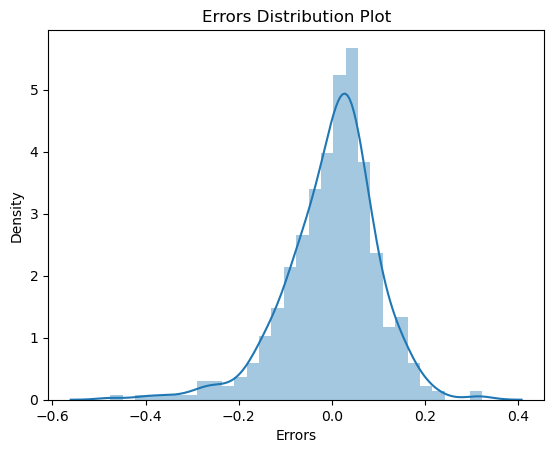

In [87]:
err = (y_train - y_train_pred)
sns.distplot(err)
plt.xlabel('Errors')
plt.title('Errors Distribution Plot')
plt.show()

Error terms seems to be normally distributed and centered around zero, thus, assumption stands True and model is significant.

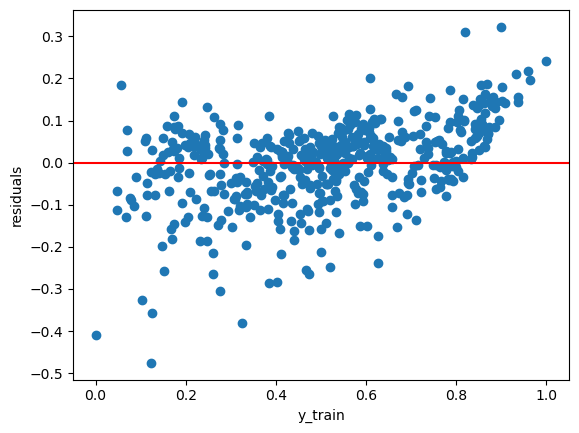

In [88]:
# Homoscedasticity Check

plt.scatter(y_train, (y_train - y_train_pred))
plt.xlabel('y_train')
plt.ylabel('residuals')
plt.axhline(0, color='red')
plt.show()

The error term seems to be same across the values of the independent variables. So, in homoscedasticity, the residual term is constant across observations, i.e., the variance is constant, so if the value of the dependent variable changes, the error term does not vary much.

In [89]:
import sklearn.metrics

train_model_r_score = sklearn.metrics.r2_score(y_train, y_train_pred)
train_model_r_score

0.8043821961833698

<br>

### Step 7 : Model Testing & Evaluation

Now that we have checked normality of error terms, so, now we shall make predictions from our model for test data

In [90]:
df_test.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,Nov,Dec,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,weather_Light Rain / Snow,weather_Mist
333,0,0,1,15.56105,61.3333,18.167586,3613,0,0,1,...,1,0,0,0,1,0,0,0,0,0
203,0,0,0,40.21435,50.0000,8.791807,3285,0,0,0,...,0,0,0,0,0,0,0,1,0,0
279,0,0,1,25.22020,68.4167,1.500244,4985,0,0,1,...,0,0,0,0,0,0,1,0,0,0
483,1,0,0,22.50605,58.7083,7.832836,6304,0,1,0,...,0,0,0,0,0,0,0,0,0,0
267,0,0,0,28.63185,84.5000,3.375406,5010,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [91]:
# Applying MinMaxScaling on test data
df_test[con_cols] = scaler.transform(df_test[con_cols])

In [92]:
df_test.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,Nov,Dec,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,weather_Light Rain / Snow,weather_Mist
333,0,0,1,0.324343,0.632030,0.488582,0.413139,0,0,1,...,1,0,0,0,1,0,0,0,0,0
203,0,0,0,1.013214,0.515242,0.185727,0.375403,0,0,0,...,0,0,0,0,0,0,0,1,0,0
279,0,0,1,0.594242,0.705024,-0.049804,0.570985,0,0,1,...,0,0,0,0,0,0,1,0,0,0
483,1,0,0,0.518402,0.604980,0.154750,0.722734,0,1,0,...,0,0,0,0,0,0,0,0,0,0
267,0,0,0,0.689572,0.870760,0.010767,0.573861,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [93]:
df_test.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,Nov,Dec,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,weather_Light Rain / Snow,weather_Mist
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.540909,0.040909,0.627273,0.569385,0.652310,0.305077,0.529134,0.250,0.245455,0.227273,...,0.068182,0.068182,0.122727,0.122727,0.145455,0.136364,0.140909,0.163636,0.022727,0.327273
std,0.499460,0.198531,0.484633,0.237294,0.141169,0.168920,0.221141,0.434,0.431338,0.420026,...,0.252632,0.252632,0.328872,0.328872,0.353363,0.343957,0.348721,0.370789,0.149373,0.470288
min,0.000000,0.000000,0.000000,0.031559,0.311386,-0.049804,0.089623,0.000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.385512,0.551846,0.185059,0.381040,0.000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.599537,0.641738,0.283969,0.525311,0.000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.761869,0.752576,0.406005,0.705476,0.250,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.064361,1.002146,0.800818,0.981707,1.000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [94]:
# Diving into X and y variables for model testing

y_test = df_test.pop('cnt')
X_test = df_test

In [95]:
X_train_data.columns

Index(['yr', 'holiday', 'atemp', 'windspeed', 'season_spring', 'season_winter',
       'Sep', 'weather_Light Rain / Snow'],
      dtype='object')

In [96]:
# Filtering all model selected variables from X_test

X_test_data = X_test[X_train_data.columns]

In [97]:
# Ading constant to test data

X_test_data_w_const = sm.add_constant(X_test_data)

In [98]:
X_test_data_w_const.head()

,const,yr,holiday,atemp,windspeed,season_spring,season_winter,Sep,weather_Light Rain / Snow
333,1.0,0,0,0.324343,0.488582,0,1,0,0
203,1.0,0,0,1.013214,0.185727,0,0,0,0
279,1.0,0,0,0.594242,-0.049804,0,1,0,0
483,1.0,1,0,0.518402,0.154750,0,0,0,0
267,1.0,0,0,0.689572,0.010767,0,1,1,0


In [99]:
# Predicting dependent variable from built model

y_test_pred = lr.predict(X_test_data_w_const)

<br>

#### Model Evaluation

The terms seems to be independent of each other as no pattern seems to be identified from scatter plot.

In [100]:
import sklearn.metrics

test_model_r_score = sklearn.metrics.r2_score(y_test, y_test_pred)
test_model_r_score

0.7711040704360751

#### R-Square of the Test Model is 0.77

In [101]:
train_model_r_score - test_model_r_score

0.03327812574729472

#### Diffrence of R-Square Training and Testing is 3.3% which is low so Model is not Over-Fitted.

Below are outcomes - 
* Train Dataset R<sup>2</sup> = 0.804
* Test Dataset R<sup>2</sup> = 0.771

##### Below is the equation of our best fitted line for the model -

$ cnt_{pred} = 0.212417 + (0.238975 \times yr) + (-0.059668 \times holiday) + (0.445775 \times atemp) + (-0.106859 \times windspeed) + (-0.125356 \times season\_spring) + (0.042674 \times season\_winter) + (0.039414 \times Sep) + (-0.236068 \times weather\_Light Rain / Snow) $

##### Thus, below mentioned features are significant in predicated Bike Rental users -

* **yr**
* **holiday**
* **atemp**
* **windspeed**
* **season_spring**
* **season_winter**
* **Sep**
* **weather_Light Rain / Snow**

##### About 77% of the variance is explained by the Model.

<br>

<p style='text-align: right;'> -- Bike Sharing Dataset Case Study by Ruchir Dhingra<br>Thank You</p>